In [1]:
%matplotlib inline

# 2. Test with PSPNet Pre-trained Models

This is a quick demo of using GluonCV PSPNet model on ADE20K dataset.
Please follow the `installation guide <../../index.html#installation>`__
to install MXNet and GluonCV if not yet.



In [2]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

## Prepare the image

download the example image



In [3]:
#  url = 'https://github.com/zhanghang1989/image-data/blob/master/encoding/' + \
#     'segmentation/ade20k/ADE_val_00001142.jpg?raw=true'
filename = 'test.jpg'
# gluoncv.utils.download(url, filename, True)

load the image



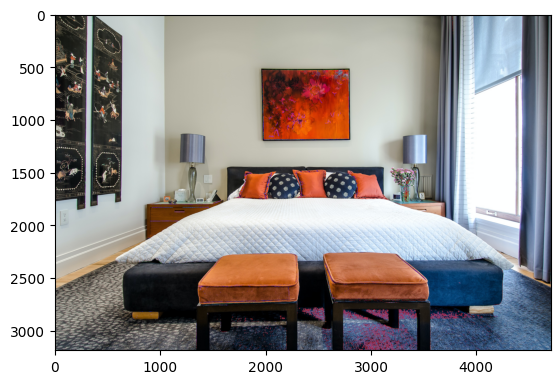

In [4]:
img = image.imread(filename)

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

normalize the image using dataset mean



In [5]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)

## Load the pre-trained model and make prediction

get pre-trained model



In [6]:
model = gluoncv.model_zoo.get_model('psp_resnet101_ade', pretrained=True)

self.crop_size 480


make prediction using single scale



In [7]:
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

MXNetError: Traceback (most recent call last):
  File "../src/c_api/c_api_ndarray.cc", line 59
MXNetError: Check failed: inp->shape().Size() < (int64_t{1} << 31) - 1 (2250659400 vs. 2147483647) : [SetNDInputsOutputs] Size of tensor you are trying to allocate is larger than 2^31 elements. Please build with flag USE_INT64_TENSOR_SIZE=1

: 

Add color pallete for visualization



In [ ]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'ade20k')
mask.save('output.png')

show the predicted mask



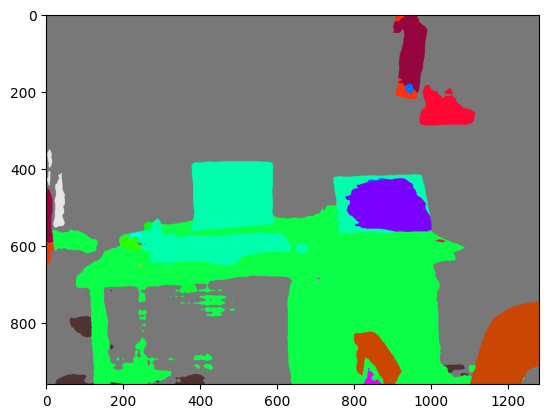

In [ ]:
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()